## **Data Preprocessing**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
from scipy.interpolate import griddata

df=pd.read_csv('sessional.csv')

/tmp/ipython-input-2450198756.py:8: DtypeWarning:

Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.



printing null values

In [49]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df.isnull().sum())

Index                                                                                                 0
Variant                                                                                               0
Region, subregion, country or area *                                                                  0
Notes                                                                                             16355
Location code                                                                                         0
ISO3 Alpha-code                                                                                    4445
ISO2 Alpha-code                                                                                    4519
SDMX code**                                                                                        1041
Type                                                                                                  0
Parent code                                                     

In [50]:
df.shape

(21983, 65)

Dropping columns not needed in analysis

In [51]:
df = df.drop(columns=['Notes', 'SDMX code**','ISO3 Alpha-code','ISO2 Alpha-code','Variant'], axis=1)


Seeing and adjusting datatypes

In [52]:
df.dtypes

Index                                                                                               int64
Region, subregion, country or area *                                                               object
Location code                                                                                       int64
Type                                                                                               object
Parent code                                                                                         int64
Year                                                                                              float64
Total Population, as of 1 January (thousands)                                                      object
Total Population, as of 1 July (thousands)                                                         object
Male Population, as of 1 July (thousands)                                                          object
Female Population, as of 1 July (thousands)                                                        object
Population Density, as of 1 July (persons per square km)                                           object
Population Sex Ratio, as of 1 July (males per 100 females)                                         object
Median Age, as of 1 July (years)                                                                   object
Natural Change, Births minus Deaths (thousands)                                                    object
Rate of Natural Change (per 1,000 population)                                                      object
Population Change (thousands)                                                                      object
Population Growth Rate (percentage)                                                                object
Population Annual Doubling Time (years)                                                            object
Births (thousands)                                                                                 object
Births by women aged 15 to 19 (thousands)                                                          object
Crude Birth Rate (births per 1,000 population)                                                     object
Total Fertility Rate (live births per woman)                                                       object
Net Reproduction Rate (surviving daughters per woman)                                              object
Mean Age Childbearing (years)                                                                      object
Sex Ratio at Birth (males per 100 female births)                                                   object
Total Deaths (thousands)                                                                           object
Male Deaths (thousands)                                                                            object
Female Deaths (thousands)                                                                          object
Crude Death Rate (deaths per 1,000 population)                                                     object
Life Expectancy at Birth, both sexes (years)                                                       object
Male Life Expectancy at Birth (years)                                                              object
Female Life Expectancy at Birth (years)                                                            object
Life Expectancy at Age 15, both sexes (years)                                                      object
Male Life Expectancy at Age 15 (years)                                                             object
Female Life Expectancy at Age 15 (years)                                                           object
Life Expectancy at Age 65, both sexes (years)                                                      object
Male Life Expectancy at Age 65 (years)                                                             object
Female Life Expectancy at Age 65 (years)                                      

In [53]:
int_cols = [
    "Index",
    "Location code",
    "Parent code"
]
string_cols = [
    "Region, subregion, country or area *",
    "Type"
]
Year_col = ["Year"]

for col in df.columns:
    if col not in string_cols:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", "", regex=False)
            .str.replace(" ", "", regex=False)
            .str.strip()
        )

# ---- Identifying float columns ---- #
float_cols = [
    col for col in df.columns
    if col not in int_cols + string_cols + Year_col
]
# ---- Applying conversions ---- #
df[int_cols] = df[int_cols].apply(pd.to_numeric, errors="coerce").astype("Int64")
df[float_cols] = df[float_cols].apply(pd.to_numeric, errors="coerce")
df[string_cols] = df[string_cols].astype("string")

df["Year"] = pd.to_datetime(pd.to_numeric(df["Year"], errors="coerce").astype("Int64"), format="%Y")


In [54]:
df.dtypes

Index                                                                                                      Int64
Region, subregion, country or area *                                                              string[python]
Location code                                                                                              Int64
Type                                                                                              string[python]
Parent code                                                                                                Int64
Year                                                                                              datetime64[ns]
Total Population, as of 1 January (thousands)                                                            float64
Total Population, as of 1 July (thousands)                                                               float64
Male Population, as of 1 July (thousands)                                                                float64
Female Population, as of 1 July (thousands)                                                              float64
Population Density, as of 1 July (persons per square km)                                                 float64
Population Sex Ratio, as of 1 July (males per 100 females)                                               float64
Median Age, as of 1 July (years)                                                                         float64
Natural Change, Births minus Deaths (thousands)                                                          float64
Rate of Natural Change (per 1,000 population)                                                            float64
Population Change (thousands)                                                                            float64
Population Growth Rate (percentage)                                                                      float64
Population Annual Doubling Time (years)                                                                  float64
Births (thousands)                                                                                       float64
Births by women aged 15 to 19 (thousands)                                                                float64
Crude Birth Rate (births per 1,000 population)                                                           float64
Total Fertility Rate (live births per woman)                                                             float64
Net Reproduction Rate (surviving daughters per woman)                                                    float64
Mean Age Childbearing (years)                                                                            float64
Sex Ratio at Birth (males per 100 female births)                                                         float64
Total Deaths (thousands)                                                                                 float64
Male Deaths (thousands)                                                                                  float64
Female Deaths (thousands)                                                                                float64
Crude Death Rate (deaths per 1,000 population)                                                           float64
Life Expectancy at Birth, both sexes (years)                                                             float64
Male Life Expectancy at Birth (years)                                                                    float64
Female Life Expectancy at Birth (years)                                                                  float64
Life Expectancy at Age 15, both sexes (years)                                                            float64
Male Life Expectancy at Age 15 (years)                                                                   float64
Female Life Expectancy at Age 15 (years)                                                                 float64
Life Expectancy at Age 65, both sexes (years)

Renaming Long Column names for easy coding

In [55]:
df = df.rename(columns={
    "Region, subregion, country or area *": "Region",
    "Location code": "LocationCode",
    "Parent code": "ParentCode",
    "Total Population, as of 1 January (thousands)": "TotalPopJan",
    "Total Population, as of 1 July (thousands)": "TotalPopJul",
    "Male Population, as of 1 July (thousands)": "PopMale",
    "Female Population, as of 1 July (thousands)": "PopFemale",
    "Population Density, as of 1 July (persons per square km)": "PopDensity",
    "Population Sex Ratio, as of 1 July (males per 100 females)": "PopSexRatio",
    "Median Age, as of 1 July (years)": "MedianAge",
    "Natural Change, Births minus Deaths (thousands)": "NaturalChange",
    "Rate of Natural Change (per 1,000 population)": "NaturalChangeRate",
    "Population Change (thousands)": "PopChange",
    "Population Growth Rate (percentage)": "PopGrowthRate",
    "Population Annual Doubling Time (years)": "DoubleTime",
    "Births (thousands)": "Births",
    "Births by women aged 15 to 19 (thousands)": "Births15to19",
    "Crude Birth Rate (births per 1,000 population)": "CrudeBirthRate",
    "Total Fertility Rate (live births per woman)": "TFR",
    "Net Reproduction Rate (surviving daughters per woman)": "NRR",
    "Mean Age Childbearing (years)": "MeanAgeChildbearing",
    "Sex Ratio at Birth (males per 100 female births)": "BirthSexRatio",
    "Total Deaths (thousands)": "Deaths",
    "Male Deaths (thousands)": "DeathsMale",
    "Female Deaths (thousands)": "DeathsFemale",
    "Crude Death Rate (deaths per 1,000 population)": "CrudeDeathRate",
    "Life Expectancy at Birth, both sexes (years)": "LifeExpBirth",
    "Male Life Expectancy at Birth (years)": "LifeExpBirthMale",
    "Female Life Expectancy at Birth (years)": "LifeExpBirthFemale",
    "Life Expectancy at Age 15, both sexes (years)": "LifeExp15",
    "Male Life Expectancy at Age 15 (years)": "LifeExp15Male",
    "Female Life Expectancy at Age 15 (years)": "LifeExp15Female",
    "Life Expectancy at Age 65, both sexes (years)": "LifeExp65",
    "Male Life Expectancy at Age 65 (years)": "LifeExp65Male",
    "Female Life Expectancy at Age 65 (years)": "LifeExp65Female",
    "Life Expectancy at Age 80, both sexes (years)": "LifeExp80",
    "Male Life Expectancy at Age 80 (years)": "LifeExp80Male",
    "Female Life Expectancy at Age 80 (years)": "LifeExp80Female",
    "Infant Deaths, under age 1 (thousands)": "InfantDeaths",
    "Infant Mortality Rate (infant deaths per 1,000 live births)": "InfantMortalityRate",
    "Live Births Surviving to Age 1 (thousands)": "BirthsSurviving1",
    "Under-Five Deaths, under age 5 (thousands)": "Under5Deaths",
    "Under-Five Mortality (deaths under age 5 per 1,000 live births)": "Under5Mortality",
    "Mortality before Age 40, both sexes (deaths under age 40 per 1,000 live births)": "Mortality40",
    "Male Mortality before Age 40 (deaths under age 40 per 1,000 male live births)": "Mortality40Male",
    "Female Mortality before Age 40 (deaths under age 40 per 1,000 female live births)": "Mortality40Female",
    "Mortality before Age 60, both sexes (deaths under age 60 per 1,000 live births)": "Mortality60",
    "Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)": "Mortality60Male",
    "Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)": "Mortality60Female",
    "Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)": "Mortality15to50",
    "Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)": "Mortality15to50Male",
    "Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)": "Mortality15to50Female",
    "Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)": "Mortality15to60",
    "Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)": "Mortality15to60Male",
    "Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)": "Mortality15to60Female",
    "Net Number of Migrants (thousands)": "NetMigrants",
    "Net Migration Rate (per 1,000 population)": "NetMigrationRate"
})


## **Visualizations**

<Figure size 1000x600 with 0 Axes>

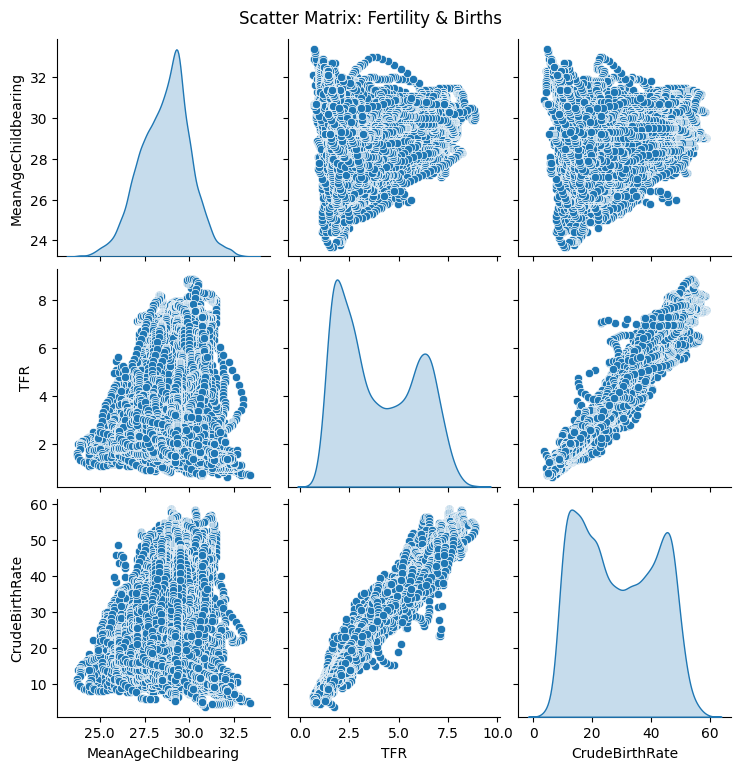

In [56]:
df_clean = df.dropna(subset=['MeanAgeChildbearing', 'TFR', 'CrudeBirthRate', 'TotalPopJan'])

plt.figure(figsize=(10,6))

sns.pairplot(
    df_clean[['MeanAgeChildbearing', 'TFR', 'CrudeBirthRate']],
    kind='scatter',
    diag_kind='kde'
)
plt.suptitle("Scatter Matrix: Fertility & Births", y=1.02)
plt.savefig("scatter_matrix_fertility_births.png", dpi=300, bbox_inches='tight')  # high-res PNG

plt.show()

In [57]:
df_map = df.dropna(subset=['TFR', 'LocationCode'])
fig = px.choropleth(
    df_map,
    locations='Region',
    color='TFR',
    hover_name='LocationCode',
    hover_data={'CrudeBirthRate': True, 'MeanAgeChildbearing': True},
    color_continuous_scale='YlOrRd',
    title='Total Fertility Rate by Country',
    locationmode='country names'
)
fig.show()
fig.write_html("total_fertility_rate_map.html")


In [58]:
df_mig = df.dropna(subset=['NetMigrants', 'LocationCode', 'Year'])

df_mig['NetMigrants'] = pd.to_numeric(df_mig['NetMigrants'], errors='coerce')
df_mig = df_mig.dropna(subset=['NetMigrants'])

df_mig['NetMigrants_abs'] = df_mig['NetMigrants'].abs()

fig = px.scatter_geo(
    df_mig,
    locations='Region',
    size='NetMigrants_abs',
    color='NetMigrants',
    hover_name='LocationCode',
    hover_data={'Region': True, 'NetMigrationRate': True, 'Year': True},
    projection='natural earth',
    size_max=40,
    color_continuous_scale='RdBu',
    animation_frame='Year',
    title='Net Migration per Country Over Time',
    locationmode='country names'
)
fig.show()
fig.write_html("net_migration_over_time.html")


/tmp/ipython-input-1013648507.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Some insights

In [59]:
df_immigrants = df_mig[df_mig['NetMigrants'] > 0]
df_emigrants = df_mig[df_mig['NetMigrants'] < 0]

top15_region_immigration = df_immigrants.groupby('Region')['NetMigrants'].sum().sort_values(ascending=False).head(15)

top15_region_emigration = df_emigrants.groupby('Region')['NetMigrants'].sum().sort_values().head(15)

top15_country_immigration = df_immigrants.groupby('LocationCode')['NetMigrants'].sum().sort_values(ascending=False).head(15)

top15_country_emigration = df_emigrants.groupby('LocationCode')['NetMigrants'].sum().sort_values().head(15)

print("Top 15 Immigration by Region:\n", top15_region_immigration)
print("\nTop 15 Emigration by Region:\n", top15_region_emigration)
print("\nTop 15 Immigration by Country:\n", top15_country_immigration)
print("\nTop 15 Emigration by Country:\n", top15_country_emigration)


Top 15 Immigration by Region:
 Region
High-income countries                                   169066.0
More developed regions                                  136304.0
Europe, Northern America, Australia, and New Zealand    134451.0
High-and-upper-middle-income countries                  133778.0
Europe and Northern America                             125552.0
Northern America                                         77079.0
United States of America                                 64770.0
Europe                                                   52319.0
Western Europe                                           31650.0
Western Asia                                             26179.0
Australia/New Zealand                                    19358.0
Germany                                                  18063.0
Northern Africa and Western Asia                         16864.0
Russian Federation                                       16329.0
Saudi Arabia                                        

In [60]:
yearly_migration = df_mig.groupby('Year')['NetMigrants'].sum()
print("Net Migration per Year:\n", yearly_migration)

Net Migration per Year:
 Year
1950-01-01      699.0
1951-01-01     1092.0
1952-01-01      882.0
1953-01-01     -589.0
1954-01-01      331.0
1955-01-01      -64.0
1956-01-01      336.0
1957-01-01    -1517.0
1958-01-01     -525.0
1959-01-01     -989.0
1960-01-01    -1398.0
1961-01-01    -1314.0
1962-01-01    -2414.0
1963-01-01    -2161.0
1964-01-01    -4746.0
1965-01-01    -3636.0
1966-01-01    -3946.0
1967-01-01      327.0
1968-01-01    -4701.0
1969-01-01    -5279.0
1970-01-01    -4634.0
1971-01-01    -7280.0
1972-01-01    -6413.0
1973-01-01    -6215.0
1974-01-01    -4760.0
1975-01-01    -3610.0
1976-01-01    -3993.0
1977-01-01    -4320.0
1978-01-01    -5096.0
1979-01-01    -7102.0
1980-01-01    -7744.0
1981-01-01    -5027.0
1982-01-01    -3399.0
1983-01-01    -4028.0
1984-01-01    -3449.0
1985-01-01    -5146.0
1986-01-01    -5843.0
1987-01-01    -5194.0
1988-01-01    -5653.0
1989-01-01    -6399.0
1990-01-01    -7756.0
1991-01-01    -8886.0
1992-01-01    -8619.0
1993-01-01   -10850.0
19

<Figure size 1200x1000 with 0 Axes>

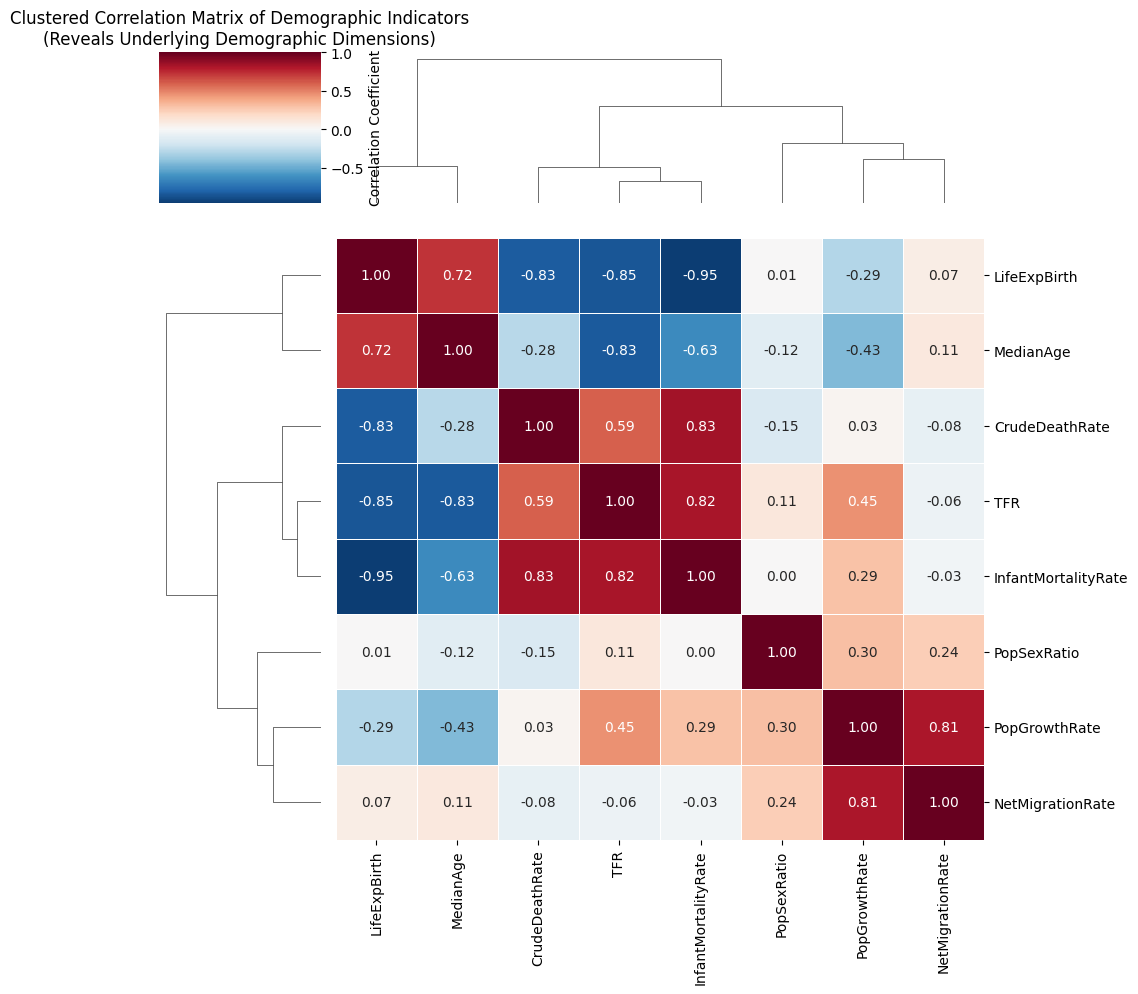

In [67]:
# Select key variables for correlation analysis
corr_vars = [
    'TFR',
    'LifeExpBirth',
    'MedianAge',
    'PopGrowthRate',
    'NetMigrationRate',
    'InfantMortalityRate',
    'PopSexRatio',
    'CrudeDeathRate'
]

# Create clustered correlation heatmap
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(12, 10))
sns.clustermap(corr_matrix,
               annot=True,
               cmap='RdBu_r',
               center=0,
               fmt='.2f',
               linewidths=0.5,
               cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Clustered Correlation Matrix of Demographic Indicators\n(Reveals Underlying Demographic Dimensions)')
plt.tight_layout()

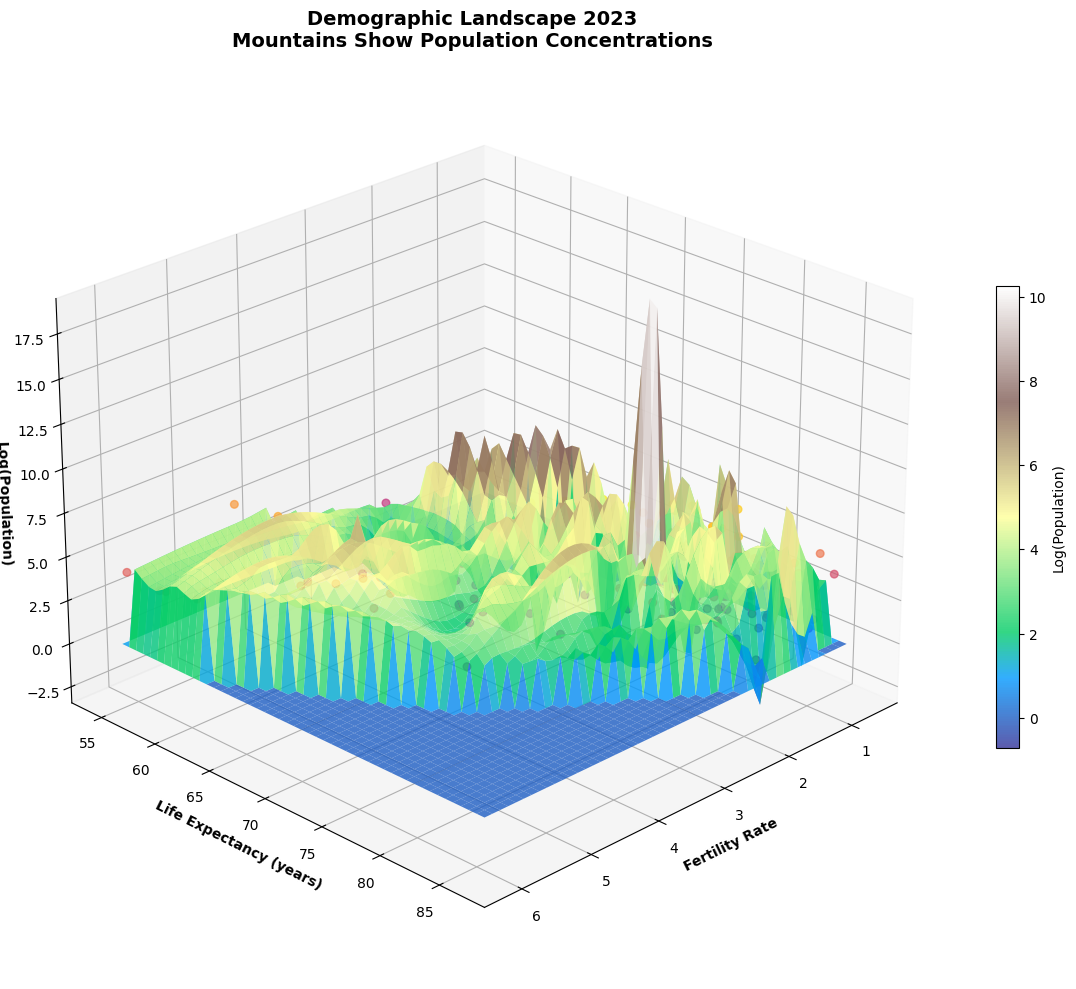

In [62]:
import numpy as np
# Prepare data for 3D surface
df_2023 = df[df['Year'].dt.year == 2023].dropna(subset=['TFR', 'LifeExpBirth','TotalPopJul'])

# Filter out zero values from 'TotalPopJul' to avoid log10(0)
df_2023 = df_2023[df_2023['TotalPopJul'] > 0]

x = df_2023['TFR'].values
y = df_2023['LifeExpBirth'].values
z = np.log10(df_2023['TotalPopJul'].values)  # Log scale for better visualization

# Create grid for surface
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate population values onto grid

zi = griddata((x, y), z, (xi, yi), method='cubic', fill_value=0)
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Create surface plot
surface = ax.plot_surface(xi, yi, zi, cmap='terrain',alpha=0.8, linewidth=0, antialiased=True, rstride=1, cstride=1)

# Add scatter points for individual countries on top of surface
scatter = ax.scatter(x, y, z, c=z, cmap='plasma', s=30, alpha=0.7)
ax.set_xlabel('Fertility Rate', fontweight='bold')
ax.set_ylabel('Life Expectancy (years)', fontweight='bold')
ax.set_zlabel('Log(Population)', fontweight='bold')

ax.set_title('Demographic Landscape 2023\nMountains Show Population Concentrations', fontsize=14, fontweight='bold')

fig.colorbar(surface, ax=ax, shrink=0.5, aspect=20, label='Log(Population)')
# Customize viewing angle
ax.view_init(elev=25, azim=45)

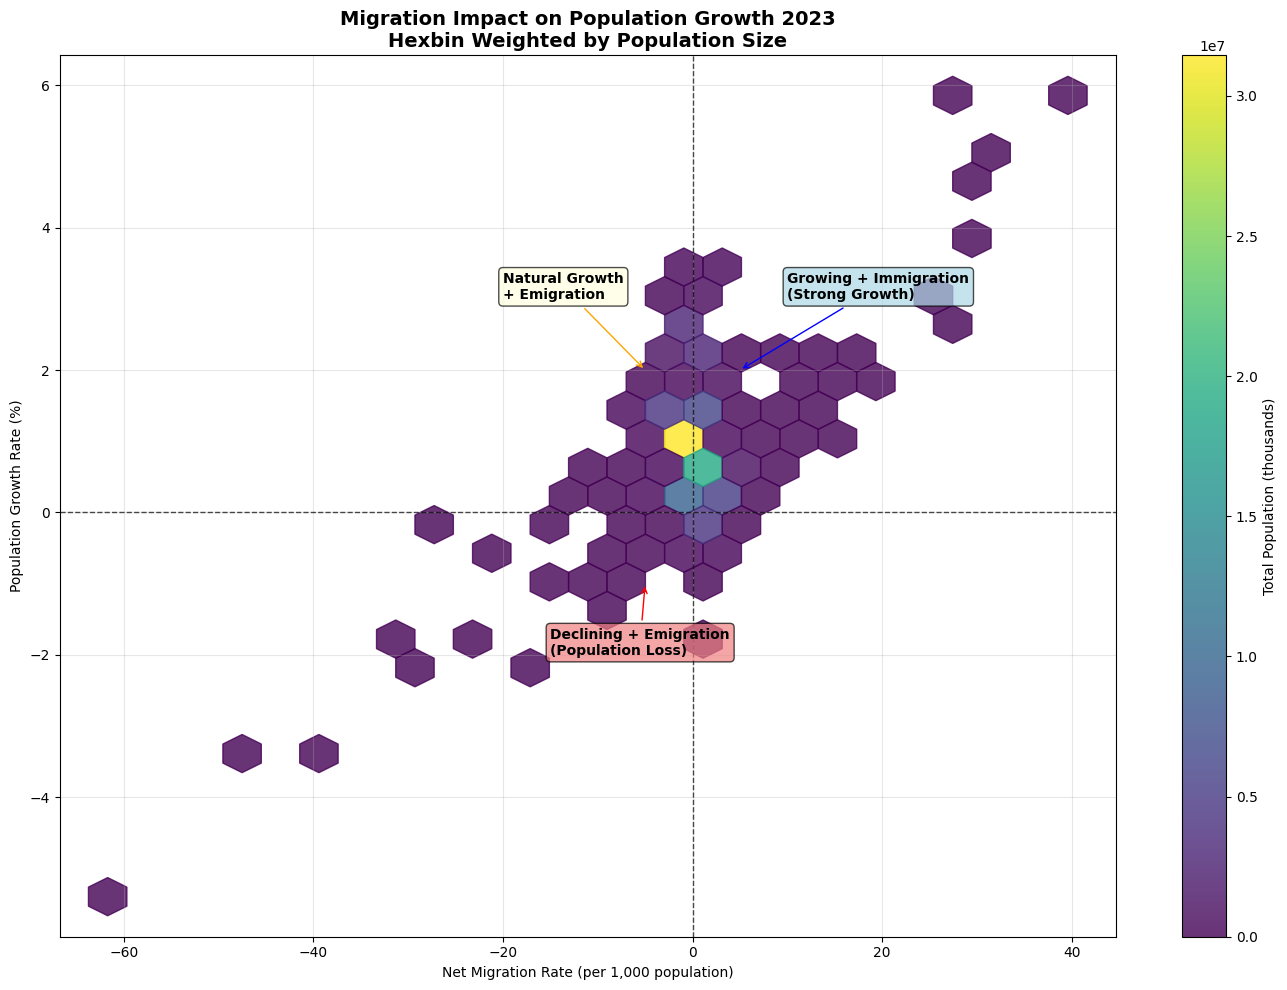

In [66]:
# Filter data for latest year
df_current = df[df['Year'].dt.year == 2023].dropna(subset=['NetMigrationRate', 'PopGrowthRate', 'TotalPopJul'])
plt.figure(figsize=(14, 10))
# Create hexbin with population weighting
hb = plt.hexbin(df_current['NetMigrationRate'],
                df_current['PopGrowthRate'],
                C=df_current['TotalPopJul'],
                gridsize=25,
                cmap='viridis',  # Red for negative, blue for positive
                reduce_C_function=np.sum,
                alpha=0.8, mincnt=1)
plt.colorbar(hb, label='Total Population (thousands)')
plt.xlabel('Net Migration Rate (per 1,000 population)')
plt.ylabel('Population Growth Rate (%)')
plt.title('Migration Impact on Population Growth 2023\nHexbin Weighted by Population Size', fontsize=14, fontweight='bold')
# Add reference lines and quadrants
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=1)

plt.axvline(x=0, color='black', linestyle='--', alpha=0.7, linewidth=1)

plt.annotate('Declining + Emigration\n(Population Loss)', xy=(-5, -1), xytext=(-15, -2),
             arrowprops=dict(arrowstyle='->', color='red'), fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
plt.annotate('Growing + Immigration\n(Strong Growth)', xy=(5, 2), xytext=(10, 3), arrowprops=dict(arrowstyle='->', color='blue'), fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.annotate('Natural Growth\n+ Emigration', xy=(-5, 2), xytext=(-20, 3), arrowprops=dict(arrowstyle='->', color='orange'), fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))
plt.grid(alpha=0.3)
plt.tight_layout()

In [102]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

RENAMED_TO_ORIGINAL_CLEAN = {
    "Deaths": "Total Deaths",
    "DeathsMale": "Male Deaths",
    "DeathsFemale": "Female Deaths",
    "CrudeDeathRate": "Crude Death Rate",
    "LifeExpBirth": "Life Expectancy at Birth",
    "LifeExpBirthMale": "Male Life Expectancy at Birth",
    "LifeExpBirthFemale": "Female Life Expectancy at Birth",
    "LifeExp15": "Life Expectancy at Age 15",
    "LifeExp15Male": "Male Life Expectancy at Age 15",
    "LifeExp15Female": "Female Life Expectancy at Age 15",
    "LifeExp65": "Life Expectancy at Age 65",
    "LifeExp65Male": "Male Life Expectancy at Age 65",
    "LifeExp65Female": "Female Life Expectancy at Age 65",
    "LifeExp80": "Life Expectancy at Age 80",
    "LifeExp80Male": "Male Life Expectancy at Age 80",
    "LifeExp80Female": "Female Life Expectancy at Age 80",
    "InfantDeaths": "Infant Deaths",
    "InfantMortalityRate": "Infant Mortality Rate",
    "BirthsSurviving1": "Live Births Surviving to Age 1",
    "Under5Deaths": "Under-Five Deaths",
    "Under5Mortality": "Under-Five Mortality",
    "Mortality40": "Mortality Before Age 40",
    "Mortality40Male": "Male Mortality Before Age 40",
    "Mortality40Female": "Female Mortality Before Age 40",
    "Mortality60": "Mortality Before Age 60",
    "Mortality60Male": "Male Mortality Before Age 60",
    "Mortality60Female": "Female Mortality Before Age 60",
    "Mortality15to50": "Mortality Between 15-50",
    "Mortality15to50Male": "Male Mortality Between 15-50",
    "Mortality15to50Female": "Female Mortality Between 15-50",
    "Mortality15to60": "Mortality Between 15-60",
    "Mortality15to60Male": "Male Mortality Between 15-60",
    "Mortality15to60Female": "Female Mortality Between 15-60"
}

mortality_cols = [col for col in RENAMED_TO_ORIGINAL_CLEAN.keys() if col in df.columns]

df_mortality_clean = df[mortality_cols].rename(columns=RENAMED_TO_ORIGINAL_CLEAN)

CATEGORY_MAP = {
    "Infant Mortality Rate": ("Childhood Mortality", "Infant Mortality", "Deaths per 1,000 live births for infants under 1 year"),
    "Under-Five Mortality": ("Childhood Mortality", "Child Mortality", "Deaths per 1,000 live births for children under 5 years"),
    "Infant Deaths": ("Childhood Mortality", "Infant Death Counts", "Total number of infant deaths (in thousands)"),
    "Under-Five Deaths": ("Childhood Mortality", "Child Death Counts", "Total number of under-five deaths (in thousands)"),
    "Live Births Surviving to Age 1": ("Childhood Mortality", "Infant Survival", "Number of live births that survive to age 1 (in thousands)"),

    "Crude Death Rate": ("Overall Mortality", "Population Death Rates", "Total deaths per 1,000 population per year"),
    "Total Deaths": ("Overall Mortality", "Death Counts", "Total number of deaths across all ages (in thousands)"),
    "Male Deaths": ("Overall Mortality", "Death Counts", "Total number of male deaths (in thousands)"),
    "Female Deaths": ("Overall Mortality", "Death Counts", "Total number of female deaths (in thousands)"),

    "Mortality Before Age 40": ("Premature Mortality", "Early Adulthood", "Probability of dying before reaching age 40"),
    "Male Mortality Before Age 40": ("Premature Mortality", "Early Adulthood", "Probability of males dying before age 40"),
    "Female Mortality Before Age 40": ("Premature Mortality", "Early Adulthood", "Probability of females dying before age 40"),
    "Mortality Before Age 60": ("Premature Mortality", "Middle Age", "Probability of dying before reaching age 60"),
    "Male Mortality Before Age 60": ("Premature Mortality", "Middle Age", "Probability of males dying before age 60"),
    "Female Mortality Before Age 60": ("Premature Mortality", "Middle Age", "Probability of females dying before age 60"),

    "Mortality Between 15-50": ("Adult Mortality", "Young & Middle Adults", "Death rates for population aged 15-50 years"),
    "Male Mortality Between 15-50": ("Adult Mortality", "Young & Middle Adults", "Death rates for males aged 15-50 years"),
    "Female Mortality Between 15-50": ("Adult Mortality", "Young & Middle Adults", "Death rates for females aged 15-50 years"),
    "Mortality Between 15-60": ("Adult Mortality", "Working Age Adults", "Death rates for population aged 15-60 years"),
    "Male Mortality Between 15-60": ("Adult Mortality", "Working Age Adults", "Death rates for males aged 15-60 years"),
    "Female Mortality Between 15-60": ("Adult Mortality", "Working Age Adults", "Death rates for females aged 15-60 years"),

    "Life Expectancy at Birth": ("Life Expectancy", "From Birth", "Average years a newborn is expected to live"),
    "Male Life Expectancy at Birth": ("Life Expectancy", "From Birth", "Average years a male newborn is expected to live"),
    "Female Life Expectancy at Birth": ("Life Expectancy", "From Birth", "Average years a female newborn is expected to live"),
    "Life Expectancy at Age 15": ("Life Expectancy", "From Age 15", "Average remaining years for a 15-year-old"),
    "Male Life Expectancy at Age 15": ("Life Expectancy", "From Age 15", "Average remaining years for a 15-year-old male"),
    "Female Life Expectancy at Age 15": ("Life Expectancy", "From Age 15", "Average remaining years for a 15-year-old female"),
    "Life Expectancy at Age 65": ("Life Expectancy", "From Age 65", "Average remaining years for a 65-year-old"),
    "Male Life Expectancy at Age 65": ("Life Expectancy", "From Age 65", "Average remaining years for a 65-year-old male"),
    "Female Life Expectancy at Age 65": ("Life Expectancy", "From Age 65", "Average remaining years for a 65-year-old female"),
    "Life Expectancy at Age 80": ("Life Expectancy", "From Age 80", "Average remaining years for an 80-year-old"),
    "Male Life Expectancy at Age 80": ("Life Expectancy", "From Age 80", "Average remaining years for an 80-year-old male"),
    "Female Life Expectancy at Age 80": ("Life Expectancy", "From Age 80", "Average remaining years for an 80-year-old female")
}

# Create color mapping for categories
CATEGORY_COLORS = {
    "Childhood Mortality": "#FF6B6B",      # Red
    "Overall Mortality": "#FFA726",        # Orange
    "Premature Mortality": "#AB47BC",      # Purple
    "Adult Mortality": "#42A5F5",          # Blue
    "Life Expectancy": "#66BB6A"           # Green
}

hierarchy_data = []
for col in df_mortality_clean.columns:
    if col in CATEGORY_MAP:
        category, subcategory, description = CATEGORY_MAP[col]
        # Calculate normalized value for coloring (0-1 scale)
        data = df_mortality_clean[col].dropna()
        if len(data) > 0:
            if data.max() > data.min():
                normalized_value = (data.mean() - data.min()) / (data.max() - data.min())
            else:
                normalized_value = 0.5
        else:
            normalized_value = 0.5

        hierarchy_data.append({
            "Metric": col,
            "Category": category,
            "Subcategory": subcategory,
            "Normalized_Value": normalized_value,
            "Description": description,
            "Importance_Score": 1,
            "Color_Category": category
        })

hierarchy_df = pd.DataFrame(hierarchy_data)

fig = px.sunburst(
    hierarchy_df,
    path=["Category", "Subcategory", "Metric"],
    values="Importance_Score",
    color="Color_Category",  # Color by category
    color_discrete_map=CATEGORY_COLORS,  # Use our custom color mapping
    hover_data={"Description": True}
)

# Update traces for better appearance
fig.update_traces(
    textinfo='label+percent parent',
    insidetextorientation='radial',
    hovertemplate='<b>%{label}</b><br><br>%{customdata[0]}<extra></extra>',
    marker=dict(
        line=dict(
            width=2,
            color='white'
        )
    )
)
fig.update_layout(
    title_text=" COMPREHENSIVE MORTALITY & LIFE EXPECTANCY METRICS HIERARCHY",
    title_x=0.5,
    title_font_size=20,
    title_font_color='#2c3e50',
    width=1200,
    height=1000,
    paper_bgcolor='rgba(248,249,250,0.9)',
    plot_bgcolor='rgba(248,249,250,0.9)',
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="#2c3e50"
    ),
    margin=dict(t=120, l=20, r=20, b=20)
)

# Add custom legend using simple annotations
fig.add_annotation(
    x=0.02, y=0.95,
    xref="paper", yref="paper",
    text="<b>COLOR LEGEND:</b>",
    showarrow=False,
    font=dict(size=12, color="black"),
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="black",
    borderwidth=1
)

color_legend_items = [
    (0.02, 0.91, "● Childhood Mortality", "#FF6B6B"),
    (0.02, 0.87, "● Overall Mortality", "#FFA726"),
    (0.02, 0.83, "● Premature Mortality", "#AB47BC"),
    (0.02, 0.79, "● Adult Mortality", "#42A5F5"),
    (0.02, 0.75, "● Life Expectancy", "#66BB6A")
]

for x, y, text, color in color_legend_items:
    fig.add_annotation(
        x=x, y=y,
        xref="paper", yref="paper",
        text=text,
        showarrow=False,
        font=dict(size=11, color=color),
        bgcolor="rgba(255,255,255,0.8)"
    )

# Add explanatory annotation
fig.add_annotation(
    text="📊 <b>How to use:</b><br>"
         "• Hover over any segment for detailed description<br>"
         "• Click to drill down into subcategories<br>"
         "• Colors represent different mortality categories",
    xref="paper", yref="paper",
    x=0.98, y=0.02,
    showarrow=False,
    bgcolor="rgba(255,255,255,0.9)",
    bordercolor="black",
    borderwidth=1,
    borderpad=10,
    font=dict(size=11, color="black"),
    align="right"
)

fig.write_html("comprehensive_mortality_sunburst.html")
print("✅ Comprehensive sunburst saved as 'comprehensive_mortality_sunburst.html'")

fig.show()

print("\n" + "="*80)
print("📊 CATEGORY SUMMARY:")
print("="*80)

for category in CATEGORY_COLORS.keys():
    category_metrics = hierarchy_df[hierarchy_df['Category'] == category]
    subcategories = category_metrics['Subcategory'].unique()
    print(f"\n {category} ({len(category_metrics)} metrics) - Color: {CATEGORY_COLORS[category]}")
    for subcat in subcategories:
        metrics = category_metrics[category_metrics['Subcategory'] == subcat]['Metric'].tolist()
        print(f"    {subcat}: {len(metrics)} metrics")

print(f"\n Total metrics visualized: {len(hierarchy_df)}")
print(" HTML file: 'comprehensive_mortality_sunburst.html'")
print("\n Features:")
print("   • Color-coded by mortality category")
print("   • Detailed descriptions on hover")
print("   • Interactive drill-down capability")
print("   • Professional styling and layout")

✅ Comprehensive sunburst saved as 'comprehensive_mortality_sunburst.html'



📊 CATEGORY SUMMARY:

🎨 Childhood Mortality (5 metrics) - Color: #FF6B6B
   📍 Infant Death Counts: 1 metrics
   📍 Infant Mortality: 1 metrics
   📍 Infant Survival: 1 metrics
   📍 Child Death Counts: 1 metrics
   📍 Child Mortality: 1 metrics

🎨 Overall Mortality (4 metrics) - Color: #FFA726
   📍 Death Counts: 3 metrics
   📍 Population Death Rates: 1 metrics

🎨 Premature Mortality (6 metrics) - Color: #AB47BC
   📍 Early Adulthood: 3 metrics
   📍 Middle Age: 3 metrics

🎨 Adult Mortality (6 metrics) - Color: #42A5F5
   📍 Young & Middle Adults: 3 metrics
   📍 Working Age Adults: 3 metrics

🎨 Life Expectancy (12 metrics) - Color: #66BB6A
   📍 From Birth: 3 metrics
   📍 From Age 15: 3 metrics
   📍 From Age 65: 3 metrics
   📍 From Age 80: 3 metrics

📈 Total metrics visualized: 33
💾 HTML file: 'comprehensive_mortality_sunburst.html'

🎯 Features:
   • Color-coded by mortality category
   • Detailed descriptions on hover
   • Interactive drill-down capability
   • Professional styling and layout


In [123]:
import plotly.graph_objects as go
import numpy as np

pakistan_data = df[df['Region'] == 'Pakistan'].iloc[0]

categories = [
    'Population Growth (%)',
    'Fertility (TFR)',
    'Education Rate (%)',
    'Median Age (Years)',
    'Gender Balance (M/F)',
    'Internet Access (%)',
    'Urbanization (%)',
    'Migration Impact (Net Migrants)'
]

# Hard-coded / example values (replace with actual data if available)
education_rate_pakistan = 59
education_rate_regional = 78
internet_access_pakistan = 35
internet_access_regional = 65
urbanization_pakistan = 38
urbanization_regional = 60

# Normalize for radar shape
def normalize(value, min_val, max_val):
    return ((value - min_val) / (max_val - min_val)) * 100

# Normalized values for plotting
values_pakistan = [
    normalize(pakistan_data['PopGrowthRate'], -1, 3),
    normalize(pakistan_data['TFR'], 1, 7),
    normalize(education_rate_pakistan, 0, 100),
    normalize(pakistan_data['MedianAge'], 0, 50),  # median age in years
    100 - abs(pakistan_data['PopSexRatio'] - 100),
    normalize(internet_access_pakistan, 0, 100),
    normalize(urbanization_pakistan, 0, 100),
    normalize(pakistan_data['NetMigrants'] + 50, 0, 100)
]

values_pakistan += [values_pakistan[0]]
categories += [categories[0]]

# Regional averages normalized
regional_avg_values = [
    45, 55,
    normalize(education_rate_regional, 0, 100),
    50, 85,
    normalize(internet_access_regional, 0, 100),
    normalize(urbanization_regional, 0, 100),
    60
] + [45]

fig = go.Figure()

# Pakistan trace
fig.add_trace(go.Scatterpolar(
    r=values_pakistan,
    theta=categories,
    fill='toself',
    fillcolor='rgba(255, 99, 71, 0.4)',
    line=dict(color='rgba(220, 20, 60, 1)', width=3),
    name='Pakistan',
    hovertemplate=[
        f'Population Growth: {pakistan_data["PopGrowthRate"]:.2f} %<extra></extra>',
        f'Fertility (TFR): {pakistan_data["TFR"]:.2f}<extra></extra>',
        f'Education Rate: {education_rate_pakistan} %<extra></extra>',
        f'Median Age: {pakistan_data["MedianAge"]:.1f} years<extra></extra>',
        f'Gender Balance: {pakistan_data["PopSexRatio"]:.1f} M/F<extra></extra>',
        f'Internet Access: {internet_access_pakistan} %<extra></extra>',
        f'Urbanization: {urbanization_pakistan} %<extra></extra>',
        f'Net Migration: {pakistan_data["NetMigrants"]} thousand<extra></extra>',
        f'Population Growth: {pakistan_data["PopGrowthRate"]:.2f} %<extra></extra>'
    ]
))

# Regional Average trace
fig.add_trace(go.Scatterpolar(
    r=regional_avg_values,
    theta=categories,
    fill='toself',
    fillcolor='rgba(30, 144, 255, 0.2)',
    line=dict(color='rgba(30, 144, 255, 0.8)', width=2, dash='dot'),
    name='Regional Average',
    hovertemplate=[
        'Population Growth: 45/100<extra></extra>',
        'Fertility (TFR): 55/100<extra></extra>',
        f'Education Rate: {education_rate_regional} %<extra></extra>',
        'Median Age: 50/100<extra></extra>',
        'Gender Balance: 85/100<extra></extra>',
        f'Internet Access: {internet_access_regional} %<extra></extra>',
        f'Urbanization: {urbanization_regional} %<extra></extra>',
        'Net Migration: 60/100<extra></extra>',
        'Population Growth: 45/100<extra></extra>'
    ]
))

# Layout
fig.update_layout(
    title=dict(
        text='Pakistan Development Profile - Spider Chart',
        x=0.5,
        font=dict(size=20, family="Arial, sans-serif")
    ),
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100],
            tickvals=[0, 25, 50, 75, 100],
            ticktext=['0', '25', '50', '75', '100'],
            tickfont=dict(size=10),
            gridcolor='rgba(0, 0, 0, 0.2)',
            linecolor='black'
        ),
        angularaxis=dict(
            tickfont=dict(size=11, family="Arial, sans-serif"),
            gridcolor='rgba(0, 0, 0, 0.1)',
            linecolor='black'
        ),
        bgcolor='white'
    ),
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="right",
        x=1.1,
        font=dict(size=12, family="Arial, sans-serif"),
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='black',
        borderwidth=1
    ),
    width=1000,
    height=800,
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(family="Arial, sans-serif", size=12, color="black")
)

fig.show()


In [132]:
import plotly.express as px

parallel_cols = [
    'TFR',
    'InfantMortalityRate',
    'LifeExpBirth',
    'MedianAge',
    'PopGrowthRate',
    'PopDensity',
    'TotalPopJul'
]

fig_parallel = px.parallel_coordinates(
    df,
    dimensions=parallel_cols,
    color='LifeExpBirth',
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={
        'TFR': 'Fertility Rate',
        'InfantMortalityRate': 'Infant Mortality',
        'LifeExpBirth': 'Life Expectancy',
        'MedianAge': 'Median Age',
        'PopGrowthRate': 'Population Growth (%)',
        'PopDensity': 'Population Density',
        'TotalPopJul': 'Total Population'
    },
    title='--------------------------------Multivariate Demographic Profiles Across Countries---------------------------------'
)

fig_parallel.update_layout(
    coloraxis_colorbar=dict(title='Life Expectancy (years)')
)

fig_parallel.show()


In [138]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Metrics for subplots
metrics = [
    ('TotalPopJul', 'Population (000s)'),
    ('PopGrowthRate', 'Population Growth (%)'),
    ('TFR', 'Fertility Rate (TFR)'),
    ('MedianAge', 'Median Age (yrs)'),
    ('InfantMortalityRate', 'Infant Mortality (/1000)'),
    ('LifeExpBirth', 'Life Expectancy (yrs)')
]

# Create 2x3 subplot layout
fig_trellis = make_subplots(
    rows=2, cols=3,
    subplot_titles=[m[1] for m in metrics],
    horizontal_spacing=0.1, vertical_spacing=0.15
)

# Assign colors to regions
region_colors = px.colors.qualitative.Plotly
region_color_map = {region: region_colors[i % len(region_colors)] for i, region in enumerate(top_regions)}

for i, (col, title) in enumerate(metrics):
    row = i // 3 + 1
    col_pos = i % 3 + 1
    for region in top_regions:
        region_data = df[df['Region'] == region].sort_values(by='Year')
        fig_trellis.add_trace(
            go.Scatter(
                x=region_data['Year'],
                y=region_data[col],
                mode='lines+markers',
                name=region,
                line=dict(color=region_color_map[region], width=2),
                marker=dict(size=6),
                showlegend=True if i==0 else False  # show legend only in first subplot
            ),
            row=row,
            col=col_pos
        )

# Update layout
fig_trellis.update_layout(
    height=800,
    width=1200,
    title_text="Demographic Trends Over Years (Top 5 Regions)",
    title_x=0.25,
    font=dict(size=12, family="Arial, sans-serif")
)

fig_trellis.show()
